In [1]:
import matplotlib
import osmnx as ox
import geopandas as gpd
import traceback
import os.path
from typing import Tuple
import warnings
from tqdm import tqdm
import pandas as pd
warnings.filterwarnings("ignore")

# osmnx.graph.graph_from_polygon #
osmnx.graph.graph_from_polygon( </br>
&nbsp; &nbsp; &nbsp;polygon, </br>
&nbsp; &nbsp; &nbsp;network_type='all', </br>
&nbsp; &nbsp; &nbsp;simplify=True, </br>
&nbsp; &nbsp; &nbsp;retain_all=False, </br>
&nbsp; &nbsp; &nbsp;truncate_by_edge=False, </br>
&nbsp; &nbsp; &nbsp;clean_periphery=None, </br>
&nbsp; &nbsp; &nbsp;custom_filter=None </br>
)</br>
Загружает и создает граф в границах полигона или мультиполигона.
| Параметр | Тип данных параметра | Описание параметра |
|-|--------|---|
|polygon|shapely.geometry.Polygon или shapely.geometry.MultiPolygon|Форма, в которой будут храниться сетевые данные. Координаты в формате широта,долгота в проекции EPSG:4326|
|network_type|string {"all", "all_public", "bike", "drive", "drive_service", "walk"}|Тип получаемой уличной, если значение custom_filter равно None|
|simplify|bool|Если True, упрощает топологию графа с помощью функции simplify_graph|
|retain_all|bool|Если True, вернет весь график, даже если он не связан. в противном случае сохранит только самый большой слабосвязный компонент.|
|truncate_by_edge|bool|Если True, узлы сохраняются за пределами граничного полигона, если хотя бы один из соседних узлов находится внутри полигона|
|custom_filter|string|Пользовательский фильтр ways, который будет использоваться вместо настроек network_type, например, также укажите network_type, который находится в settings.bidirectional_network_types, если вы хотите, чтобы график был полностью двунаправленным.|
##### ВОЗВРАЩАЕМОЕ ЗНАЧЕНИЕ:
* G - networkx.MultiDiGraph

# osmnx.convert.graph_from_gdfs #
osmnx.convert.graph_from_gdfs(</br>
&nbsp; &nbsp; &nbsp;gdf_nodes,</br>
&nbsp; &nbsp; &nbsp;gdf_edges,</br>
&nbsp; &nbsp; &nbsp;graph_attrs=None</br>
)</br>
Преобразовывает узловые и граничные фреймы геоданных в мультиграфы.
Эта функция является обратной по отношению к graph_to_gdfs и предназначена для совместной работы с ней.
Вы можете преобразовать произвольные фреймы геоданных с узлами и ребрами, если: 1) gdf_nodes уникально индексируется с помощью osmid, 2) gdf_nodes содержит столбцы координат x и y, представляющие геометрию узлов, 3) gdf_edges уникально мультииндексируется с помощью u, v, key (в соответствии с обычной структурой мультиграфа). Это позволяет загружать любые шейп-файлы узлов/ребер или слои геопакета в качестве фреймов геоданных, а затем преобразовывать их в мультиграфы для графического анализа. Обратите внимание, что любой атрибут геометрии в gdf_nodes не используется, поскольку вместо него x и y предоставляют необходимую информацию о геометрии узлов.
| Параметр | Тип данных параметра | Описание параметра |
|-|--------|---|
|gdf_nodes|geopandas.GeoDataFrame|Структура геоданных из узлов графа, уникально проиндексированных osmid|
|gdf_edges|geopandas.GeoDataFrame|Структура геоданных из ребер графа, уникально проиндексированных по u, v, key|
|graph_attrs|dict|новый атрибут G.graph, если его нет, используйте crs из gdf_edges в качестве единственного атрибута уровня графика (для gdf_edges должен быть установлен атрибут crs)|
##### ВОЗВРАЩАЕМОЕ ЗНАЧЕНИЕ
* G - networkx.MultiDiGraph

# osmnx.routing.route_to_gdf #
osmnx.routing.route_to_gdf(</br>
&nbsp;&nbsp;&nbsp;G,</br>
&nbsp;&nbsp;&nbsp;route,</br>
&nbsp;&nbsp;&nbsp;weight='length'</br>
)</br>
Возвращает Геодатафрейм ребер контура по порядку
| Параметр | Тип данных параметра | Описание параметра |
|-|--------|---|
|G|networkx.MultiDiGraph|Входной граф|
|route|list|список идентификаторов узлов, составляющих путь|
|weight|string|если между двумя узлами имеются параллельные ребра, выбирает наименьший вес|
##### ВОЗВРАЩАЕМОЕ ЗНАЧЕНИЕ
* gdf_edges (geopandas.GeoDataFrame) – Геодатафрейм ребер

# osmnx.distance.nearest_nodes #
osmnx.distance.nearest_nodes(</br>
&nbsp;&nbsp;&nbsp;G, </br>
&nbsp;&nbsp;&nbsp;X, </br>
&nbsp;&nbsp;&nbsp;Y, </br>
&nbsp;&nbsp;&nbsp;return_dist=False </br>
) </br>
Ищет ближайший узел к точку или к каждой из нескольких точек
Если X и Y являются единичными значениями координат, то будет возвращен ближайший узел к этой точке. Если X и Y являются списками значений координат, то будет возвращен ближайший узел к каждой точке.
Если граф проецируется, то для евклидова поиска ближайшего соседа используется дерево k-d, для чего требуется, чтобы scipy был установлен в качестве необязательной зависимости. Если он не запроектирован, то для поиска ближайшего соседа в haversine используется шаровое дерево, для чего требуется, чтобы scikit-learn был установлен в качестве необязательной зависимости.
| Параметр | Тип данных параметра | Описание параметра |
|-|--------|---|
|G|networkx.MultiDiGraph|График, на котором можно найти ближайшие узлы|
|X|float или list|Координаты точек по x (долготе), выраженные в тех же единицах измерения, что и на графике, и не содержащие нулей|
|Y|float или list|Координаты точек по y (широте), выраженные в тех же единицах измерения, что и на графике, и не содержащие нулей|
|return_dist|bool|Необязательный параметр, указывает возвращать или нет расстояние между точками и ближайшими узлами|
##### ВОЗВРАЩАЕМОЕ ЗНАЧЕНИЕ:
* **nn** или **(nn, dist)** (int/list or tuple) – идентификаторы ближайших узлов или, необязательно, кортеж, где dist содержит расстояния между точками и их ближайшими узлами

# osmnx.distance.shortest_path #
osmnx.distance.shortest_path( </br>
&nbsp;&nbsp;&nbsp;G,</br>
&nbsp;&nbsp;&nbsp;orig,</br>
&nbsp;&nbsp;&nbsp;dest,</br>
&nbsp;&nbsp;&nbsp;weight='length',</br>
&nbsp;&nbsp;&nbsp;cpus=1 </br>
**)**</br>
Расчитывает кратчайшее расстояние между точками
| Параметр | Тип данных параметра | Описание параметра |
|-|--------|---|
|G|networkx.MultiDiGraph|Входной граф|
|orig|int или list|Идентификатор исходного узла или список идентификаторов исходного узла|
|dest|int или list|Идентификатор узла назначения или список идентификаторов узлов назначения|
|weight|string|Атрибут ребра, который необходимо минимизировать при решении задачи поиска кратчайшего пути|
|cpus|int|Количество используемых ядер CPU если равно None - использует все доступные|
##### ВОЗВРАЩАЕМОЕ ЗНАЧЕНИЕ:
* **path** (list)– список идентификаторов узлов, составляющих кратчайший путь, или, если orig и dest являются списками, то список списков путей

# osmnx.plot.plot_graph #
osmnx.plot.plot_graph(</br>
&nbsp;&nbsp;&nbsp;G,</br>
&nbsp;&nbsp;&nbsp;ax=None,</br>
&nbsp;&nbsp;&nbsp;figsize=(8, 8),</br>
&nbsp;&nbsp;&nbsp;bgcolor='#111111',</br>
&nbsp;&nbsp;&nbsp;node_color='w',</br>
&nbsp;&nbsp;&nbsp;node_size=15,</br>
&nbsp;&nbsp;&nbsp;node_alpha=None,</br>
&nbsp;&nbsp;&nbsp;node_edgecolor='none',</br>
&nbsp;&nbsp;&nbsp;node_zorder=1,</br>
&nbsp;&nbsp;&nbsp;edge_color='#999999',</br>
&nbsp;&nbsp;&nbsp;edge_linewidth=1,</br>
&nbsp;&nbsp;&nbsp;edge_alpha=None,</br>
&nbsp;&nbsp;&nbsp;show=True,</br>
&nbsp;&nbsp;&nbsp;close=False,</br>
&nbsp;&nbsp;&nbsp;save=False,</br>
&nbsp;&nbsp;&nbsp;filepath=None,</br>
&nbsp;&nbsp;&nbsp;dpi=300,</br>
&nbsp;&nbsp;&nbsp;bbox=None</br>
)
Рисует граф
| Параметр | Тип данных параметра | Описание параметра |
|-|--------|---|
|G|networkx.MultiDiGraph|Принимаемый граф|
|ax|matplotlib axis|Если не None, построение графика по этой ранее существовавшей оси|
|figsize|tuple|Если ax-None, создайте новую фигуру с заданным размером (ширина, высота)|
|bgcolor|string|Цвет фона графика|
|node_color|string или list|Цвет(а) узл(а/ов)|
|node_size|int|Размер узлов: если 0 - пропускает построение графиков узлов|
|node_alpha|float|Непрозрачность узлов, обратите внимание: если вы передали значения RGBA в node_color, установите node_alpha=None, чтобы использовать альфа-канал в node_color|
|node_edgecolor|string|Цвет границ маркеров узлов|
|node_zorder|int|Порядок построения узлов: ребра всегда равны 1, поэтому установите node_zorder=0 для построения узлов под ребрами|
|edge_color|string или list|Цвет(а) линий ребер|
|edge_linewidth|float|Ширина линий ребер: если 0, то пропустите построение рёбер|
|edge_alpha|float|Непрозрачность краев. Примечание: если вы передали значения RGBA в edge_color, установите edge_alpha=None, чтобы использовать альфа-канал в edge_color|
|show|bool|Если True, вызывает pyplot.show() для демонстрации фигуры|
|close|bool|Если True, вызывает pyplot.close() для закрытия фигуры|
|save|bool|Если True, сохраняет фигуру на диск по пути|
|filepath|string|Если save=True, путь к файлу. Формат файла определяется по расширению. если нет, используйте settings.imgs_folder/image.png|
|dpi|int|Если save=True, содержит разрешение сохраняемого файла|
|bbox|tuple|Ограничивающий прямоугольник в виде (север,юг,восток,запад).Если нет, то вычисление будет производиться по пространственным протяженностям построенных геометрий.|
##### ВОЗВРАЩАЕМОЕ ЗНАЧЕНИЕ:
**fig**, **ax** tuple – matplotlib figure, axis

# osmnx.plot.plot_graph_route
osmnx.plot.plot_graph_route(</br>
&nbsp;&nbsp;&nbsp;G,</br>
&nbsp;&nbsp;&nbsp;route,</br>
&nbsp;&nbsp;&nbsp;route_color='r',</br>
&nbsp;&nbsp;&nbsp;route_linewidth=4,</br>
&nbsp;&nbsp;&nbsp;route_alpha=0.5,</br>
&nbsp;&nbsp;&nbsp;orig_dest_size=100,</br>
&nbsp;&nbsp;&nbsp;ax=None, **pg_kwargs</br>
**)**</br>
Визуализация маршрута на графе
| Параметр | Тип данных параметра | Описание параметра |
|-|--------|---|
|G|networkx.MultiDiGraph|Принимаемый граф|
|route|list|Маршрут как список ID узлов|
|route_color|string|Цвет маршрута|
|route_linewidth|int|Ширина линии маршрута|
|route_alpha|float|Непрозрачность линии маршрута|
|orig_dest_size|int|Размер исходного и конечного узлов|
|ax|matplotlib axis|Если не None, проложите маршрут по этой ранее существовавшей оси, вместо того чтобы создавать новую фигуру, ось и рисовать базовый график|
|pg_kwargs||Аргументы ключевого слова для передачи в plot_graph|
##### ВОЗВРАЩАЕМОЕ ЗНАЧЕНИЕ:
**fig**, **ax** (tuple) – matplotlib figure, axis

# osmnx.plot.plot_graph_routes #
osmnx.plot.plot_graph_routes( </br>
&nbsp;&nbsp;&nbsp;G,</br>
&nbsp;&nbsp;&nbsp;routes,</br>
&nbsp;&nbsp;&nbsp;route_colors='r',</br>
&nbsp;&nbsp;&nbsp;route_linewidths=4,</br>
&nbsp;&nbsp;&nbsp;**pgr_kwargs</br>
)</br>
Рисует нисколько маршрутов на графе
| Параметр | Тип данных параметра | Описание параметра |
|-|--------|---|
|G|networkx.MultiDiGraph|Входной граф|
|routes|list|Маршруты в виде списка списков идентификаторов узлов|
|route_colors|string or list|Если строка, то 1 цвет для всех маршрутов. если список, то цвета для каждого маршрута|
|route_linewidths|int или list|Если int, то ширина строки равна 1 для всех маршрутов. если list, то ширина строки для каждого маршрута.|
|pgr_kwargs||Аргументы ключевого слова для передачи в plot_graph_route|
##### ВОЗВРАЩАЕМОЕ ЗНАЧЕНИЕ:
**fig**, **ax** (tuple) – matplotlib figure, axis


In [2]:
class OSMNX:

    """
    Функция для подгрузки данных о графе при подключении к сети интернет.
    На вход идет shp-файл c сайта geojson.io.
    """
    def read_online_osmnx(self, polygon_path:str):
        try:
            if os.path.exists(polygon_path):
                polygon = gpd.read_file(polygon_path)
                ox.settings.log_console = True
                ox.settings.use_cache = True
                area = polygon["geometry"].iloc[0]
                graph = ox.graph_from_polygon(area, network_type = "drive")
                return graph
            else:
                raise FileNotFoundError
        except:
            print(traceback.format_exc())

    """
    Для использования уже выгруженных shp-файлов.
    Рядом с shp-файлами должны лежать файлы dbf.
    """
    def read_offline_osmnx(
        self,
        nodes_path:str,
        edges_path:str
    ):
        try:
            exist_files_bool = os.path.exists(nodes_path) & os.path.exists(edges_path)
            if exist_files_bool:
                try:
                    """
                    Считываем файлы, преобразовываем их чтобы конвертировать в граф:
                     - в файле с nodes - поле osmid устанавливается как индекс
                     - в файле с edges - поля u,v,key устанавливаются как индексы
                    """
                    nodes = gpd.read_file(nodes_path).reset_index()
                    nodes = nodes.set_index('osmid')
                    edges = gpd.read_file(edges_path).reset_index()
                    edges = edges.set_index(['u','v','key'])
                    graph_attrs = {"crs": "EPSG:4326"}
                    graph = ox.convert.graph_from_gdfs(
                        nodes,
                        edges,
                        graph_attrs = graph_attrs
                    )
                    return graph
                except:
                    raise OsmnxError
            else:
                raise FileNotFoundError
        except:
            error = traceback.format_exc()
            print(error)

    """
    Поиск кратчайшего маршрута между точками.
    На вход передается: 
    - граф
    - параметр по которому необходимо проводить оптимизацию (length/time)
    - координаты точек, между которыми необходимо рассчитать оптимальный маршрут
    """
    def search_shortest_route(
        self,
        graph,
        weight_param,
        latlng1: Tuple[float,float],
        latlng2: Tuple[float,float]
    ):
        try:
            latlng1 = list(reversed(latlng1))
            latlng2 = list(reversed(latlng2))
            start_point_node = ox.distance.nearest_nodes(
                graph,
                *latlng1
            )
            finish_point_node = ox.distance.nearest_nodes(
                graph,
                *latlng2
            )
            shortest_route = ox.distance.shortest_path(
                graph,
                start_point_node,
                finish_point_node,
                weight=weight_param
            )
            return shortest_route
        except:
            print(f'Произошла ошибка {traceback.format_exc()}')

    """
    Функция для расчета расстояния построенных маршрутов.
    """
    def search_route_length(self, graph, route):
        try:
            gdf = ox.utils_graph.route_to_gdf(graph, route)
            total_length = gdf["length"].sum()
            return total_length
        except:
            print(traceback.format_exc())

    """
    Функция для визуализации графа.
    """
    def draw_graph(self, graph):
        ox.plot_graph(graph)

    """
    Функция для визуализации графа и маршрута на нем.
    """
    def draw_shortest_route(self, graph, route):
        try:
            fig, ax = ox.plot_graph_route(
                graph,
                route,
                route_color = "c",
                node_size = 0
            )
        except:
            print(f'Произошла ошибка {traceback.format_exc()}')

    """
    Функция для сохранения графа.
    """
    def save_graph(self, graph):
        nodes = ox.convert.graph_to_gdfs(
            graph,
            nodes = True,
            edges = False,
            node_geometry = True,
            fill_edge_geometry = True
        )
        edges = ox.convert.graph_to_gdfs(
            graph,
            nodes= False,
            edges = True,
            node_geometry = True,
            fill_edge_geometry = True
        )
        nodes.to_file('nodes.shp')
        edges.to_file('edges.shp')

In [3]:
osmnx = OSMNX()
# graph = osmnx.read_online_osmnx('POLYGON.shp')
# osmnx.draw_graph(graph)

In [ ]:
osmnx.save_graph(graph)

In [4]:
# concat Moscow parts
mp1_nodes = gpd.read_file('Москва+/moscow_p1_nodes.shp').reset_index()
mp2_nodes = gpd.read_file('Москва+/moscow_p2_nodes.shp').reset_index()

mp1_edges = gpd.read_file('Москва+/moscow_p1_edges.shp').reset_index()
mp2_edges = gpd.read_file('Москва+/moscow_p2_edges.shp').reset_index()

full_nodes = pd.concat([mp1_nodes, mp2_nodes]).set_index('osmid')
full_edges = pd.concat([mp1_edges, mp2_edges]).set_index(['u','v','key'])

graph = ox.convert.graph_from_gdfs(
    full_nodes,
    full_edges,
    graph_attrs = {'crs': "EPSG:4326"}
)

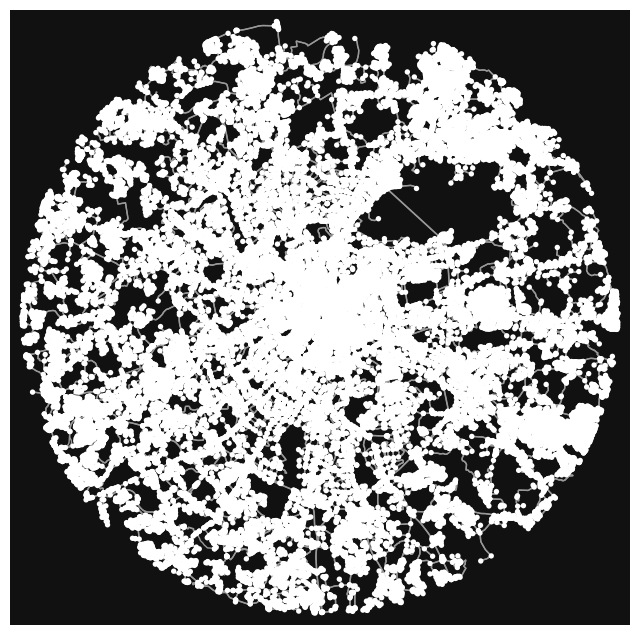

In [5]:
osmnx.draw_graph(graph)

In [6]:
graph2 = osmnx.read_online_osmnx('POLYGON.shp')

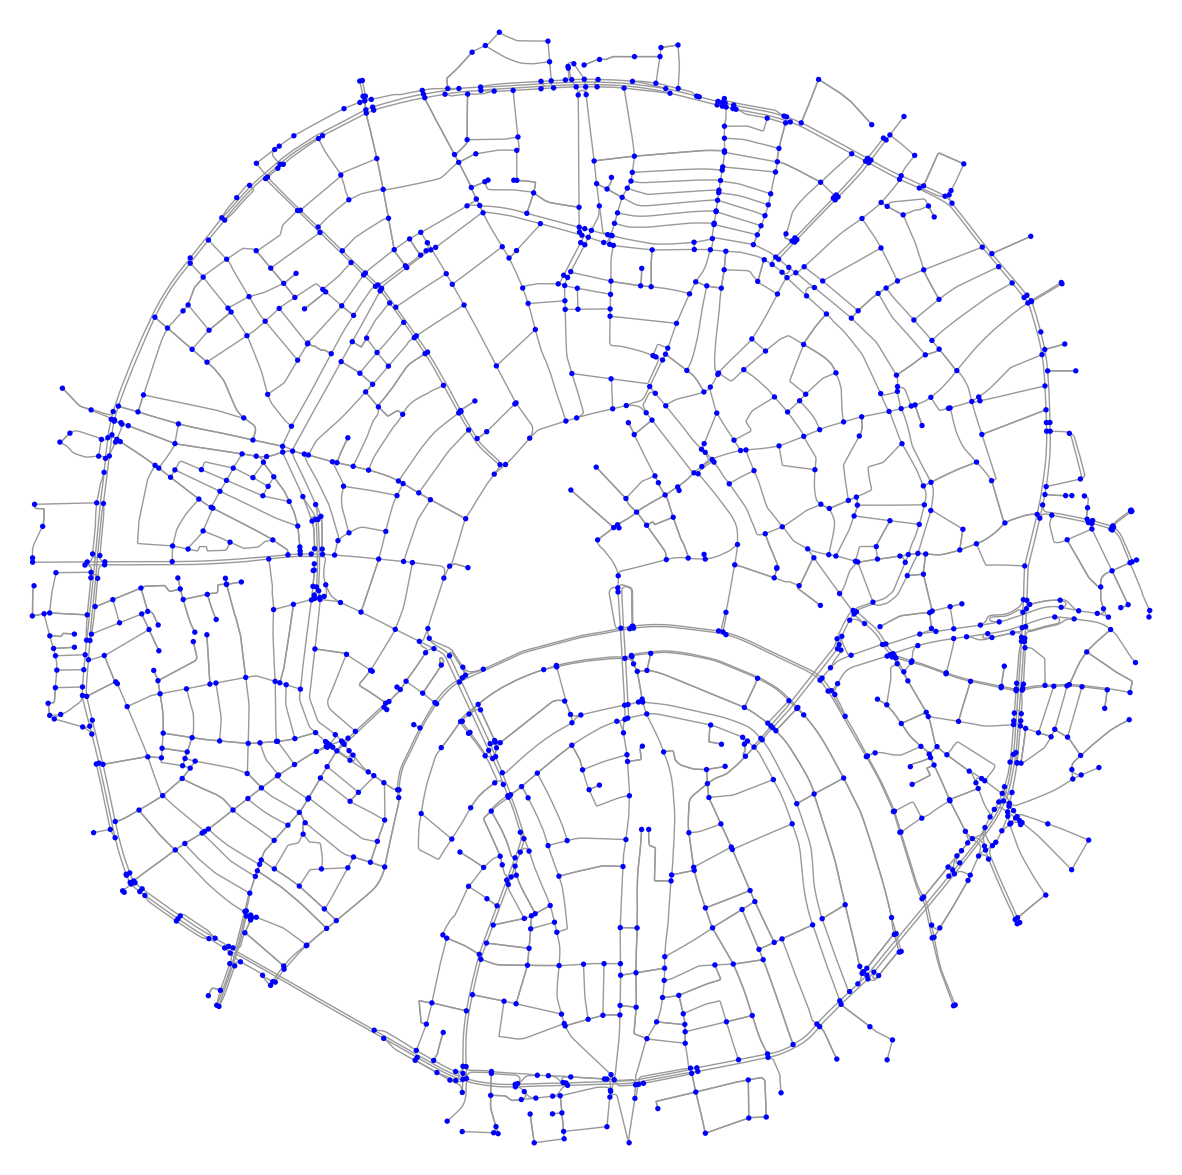

In [10]:
#osmnx.draw_graph(graph2)
res = ox.plot_graph(
    graph2,
    figsize = (15,15),
    bgcolor='#FFFFFF',
    node_color='b',
    dpi=600
)
   # ax=None,
   # figsize=(8, 8),
   # bgcolor='#111111',
   # node_color='w',
   # node_size=15,
   # node_alpha=None,
   # node_edgecolor='none',
   # node_zorder=1,
   # edge_color='#999999',
   # edge_linewidth=1,
   # edge_alpha=None,
   # show=True,
   # close=False,
   # save=False,
   # filepath=None,
   # dpi=300,
   # bbox=None

In [19]:
*res

SyntaxError: can't use starred expression here (1390325475.py, line 1)

In [20]:
from PIL import Image
 
#fig, ax = plt.subplots()
#ax.plot([1, 2, 3], [1, 2, 3])
fig, ax = res[0], res[1]
# Convert Matplotlib figure to PIL Image
fig.canvas.draw()
buf = fig.canvas.tostring_rgb()
width, height = fig.canvas.get_width_height()
pil_image = Image.frombytes("RGB", (width, height), buf)
 
# Save PIL Image as PNG
pil_image.save('pil_image_save.png')

In [ ]:
full_nodes = full_nodes.reset_index()
full_nodes = full_nodes.set_index('osmid')
                    
full_edges = full_edges.reset_index()
full_edges = full_edges.set_index(['u','v','key'])

graph_attrs = {"crs": "EPSG:4326"}
graph = ox.convert.graph_from_gdfs(
    full_nodes,
    full_edges,
    graph_attrs = graph_attrs
)

In [ ]:
osmnx.draw_graph(graph)

In [ ]:
graph2= osmnx.read_offline_osmnx('nodes.shp','edges.shp')

In [ ]:
origin = (55.764958, 37.605366)
destination = (55.751884, 37.651736)
shortest_route_by_length = osmnx.search_shortest_route(graph2, 'length', origin, destination)
shortest_route_by_time = osmnx.search_shortest_route(graph2, 'time', origin, destination)

In [ ]:
result_length = osmnx.search_route_length(graph2, shortest_route_by_length)
print(result_length)

In [ ]:
osmnx.draw_shortest_route(graph2, shortest_route_by_length)

In [ ]:
osmnx.draw_shortest_route(graph2, shortest_route_by_time)

In [ ]:
#osmnx.save_graph(graph)

In [ ]:
gdf[:5]